In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wildfires = pd.read_csv('wildfire_data.csv', index_col =0)
wildfires

/var/folders/vm/dcq1hzns3h1_dw72fsk3z0dc0000gp/T/ipykernel_56128/3355024671.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  wildfires = pd.read_csv('wildfire_data.csv', index_col =0)


,FIRE_NAME,FIRE_YEAR,DISCOVERY_DOY,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,FOUNTAIN,2005,33,9.0,Miscellaneous,2453403.5,0.10,A,40.036944,-121.005833,CA,63.0,63.0,Plumas
1,PIGEON,2004,133,1.0,Lightning,2453137.5,0.25,A,38.933056,-120.404444,CA,61.0,61.0,Placer
2,SLACK,2004,152,5.0,Debris Burning,2453156.5,0.10,A,38.984167,-120.735556,CA,17.0,17.0,El Dorado
3,DEER,2004,180,1.0,Lightning,2453189.5,0.10,A,38.559167,-119.913333,CA,3.0,3.0,Alpine
4,STEVENOT,2004,180,1.0,Lightning,2453189.5,0.10,A,38.559167,-119.933056,CA,3.0,3.0,Alpine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,ODESSA 2,2015,269,13.0,Missing/Undefined,2457291.5,0.01,A,40.481637,-122.389375,CA,NaN,NaN,NaN
1880461,NaN,2015,278,9.0,Miscellaneous,NaN,0.20,A,37.617619,-120.938570,CA,NaN,NaN,NaN
1880462,NaN,2015,122,13.0,Missing/Undefined,NaN,0.10,A,37.617619,-120.938570,CA,NaN,NaN,NaN
1880463,NaN,2015,287,13.0,Missing/Undefined,NaN,2.00,B,37.672235,-120.898356,CA,NaN,NaN,NaN


In [3]:
wildfires.describe()

,FIRE_YEAR,DISCOVERY_DOY,STAT_CAUSE_CODE,CONT_DATE,FIRE_SIZE,LATITUDE,LONGITUDE,FIPS_CODE
count,1.880465e+06,1.880465e+06,1.880465e+06,9.889340e+05,1.880465e+06,1.880465e+06,1.880465e+06,1.202317e+06
mean,2.003710e+03,1.647191e+02,5.979037e+00,2.453238e+06,7.452016e+01,3.678121e+01,-9.570494e+01,9.578350e+01
std,6.663099e+00,9.003891e+01,3.483860e+00,2.687548e+03,2.497598e+03,6.139031e+00,1.671694e+01,9.861505e+01
min,1.992000e+03,1.000000e+00,1.000000e+00,2.448622e+06,1.000000e-05,1.793972e+01,-1.788026e+02,1.000000e+00
25%,1.998000e+03,8.900000e+01,3.000000e+00,2.450701e+06,1.000000e-01,3.281860e+01,-1.103635e+02,2.900000e+01
50%,2.004000e+03,1.640000e+02,5.000000e+00,2.453466e+06,1.000000e+00,3.545250e+01,-9.204304e+01,6.700000e+01
75%,2.009000e+03,2.300000e+02,9.000000e+00,2.455754e+06,3.300000e+00,4.082720e+01,-8.229760e+01,1.210000e+02
max,2.015000e+03,3.660000e+02,1.300000e+01,2.457392e+06,6.069450e+05,7.033060e+01,-6.525694e+01,8.100000e+02


In [26]:
avg_fire_size = wildfires.groupby('STAT_CAUSE_DESCR')['FIRE_SIZE'].mean().reset_index()
avg_fire_size

,STAT_CAUSE_DESCR,FIRE_SIZE
0,Arson,33.707961
1,Campfire,45.036860
2,Children,7.681107
3,Debris Burning,13.928678
4,Equipment Use,46.060255
5,Fireworks,27.670201
6,Lightning,312.543994
7,Miscellaneous,44.453310
8,Missing/Undefined,52.492610
9,Powerline,111.395547


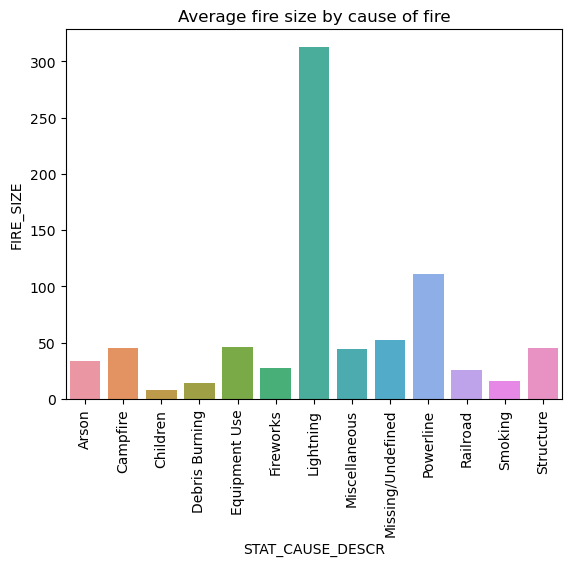

In [31]:
avg_fire_size = wildfires.groupby('STAT_CAUSE_DESCR')['FIRE_SIZE'].mean().reset_index()
# Plot the bar plot
fig = sns.barplot(x='STAT_CAUSE_DESCR', y='FIRE_SIZE', data=avg_fire_size)
plt.title("Average fire size by cause of fire")
plt.xticks(rotation=90)
plt.show()

In [5]:
import geopandas 
import geodatasets
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
import folium


In [6]:
geometry = [Point(xy) for xy in zip(wildfires['LONGITUDE'], wildfires['LATITUDE'])]
fires_gdf = geopandas.GeoDataFrame(wildfires, geometry=geometry)   

In [7]:
state = geopandas.read_file("ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp")
state.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.05950 49.0..."
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -115.96780 47.9..."


In [8]:
wildfires_gdf = pd.merge(wildfires, state, left_on = "STATE", right_on = "name_alt", how = "outer")x

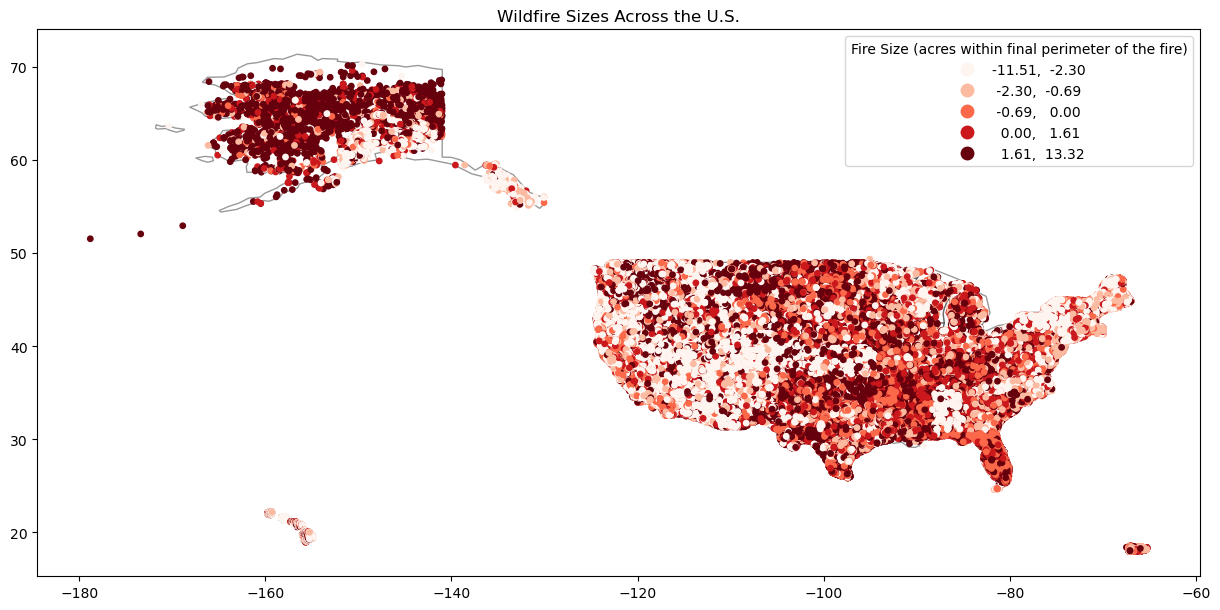

In [10]:
fig, ax = plt.subplots(figsize=(15,15))
state.plot(ax=ax, alpha=0.4, color = 'white', edgecolor = 'black')

size_normalized = np.log(fires_gdf["FIRE_SIZE"])

fires_gdf.plot(column=size_normalized,  # estimate of acres within the final perimeter of the fire
            cmap = "Reds", 
            scheme = "quantiles", 
            legend = True,
            markersize=15,
            legend_kwds={'title': 'Fire Size (acres within final perimeter of the fire)'},
            ax = ax)


plt.title("Wildfire Sizes Across the U.S.")

plt.savefig('wildfire_map.png')


In [11]:
ca = wildfires[wildfires['STATE'] == 'MN']
ca.count()


FIRE_NAME           14827
FIRE_YEAR           44769
DISCOVERY_DOY       44769
STAT_CAUSE_CODE     44769
STAT_CAUSE_DESCR    44769
CONT_DATE           19336
FIRE_SIZE           44769
FIRE_SIZE_CLASS     44769
LATITUDE            44769
LONGITUDE           44769
STATE               44769
COUNTY              30616
FIPS_CODE           30616
FIPS_NAME           30616
dtype: int64

In [12]:
import altair as alt
import random
random.seed(49)

In [13]:
drop_indices = np.random.choice(wildfires.index, 1875465, replace=False)
wildfires_less = wildfires.drop(drop_indices)
wildfires_less.head()
wildfires_less.describe()

,FIRE_YEAR,DISCOVERY_DOY,STAT_CAUSE_CODE,CONT_DATE,FIRE_SIZE,LATITUDE,LONGITUDE,FIPS_CODE
count,5000.000000,5000.000000,5000.000000,2.578000e+03,5000.000000,5000.000000,5000.000000,3150.000000
mean,2003.733600,165.814400,5.901400,2.453264e+06,53.564878,36.907639,-96.114185,99.423810
std,6.753647,89.450117,3.465672,2.735278e+03,1164.049000,6.243735,16.672302,101.659834
min,1992.000000,1.000000,1.000000,2.448622e+06,0.001000,17.970369,-163.302600,1.000000
25%,1998.000000,92.000000,3.000000,2.450611e+06,0.100000,32.825172,-110.707522,31.000000
50%,2004.000000,167.000000,5.000000,2.453548e+06,1.000000,35.437055,-92.710380,69.000000
75%,2009.000000,230.250000,9.000000,2.455791e+06,3.240000,41.066500,-82.580617,125.000000
max,2015.000000,366.000000,13.000000,2.457386e+06,64000.000000,66.166300,-65.468849,503.000000


In [14]:
line_chart = alt.Chart(wildfires_less).mark_line(
    color = 'red',
    strokeWidth = 3,
).encode(
    alt.Y('count(FIRE_YEAR):Q', title = 'Wildfires (count)'),
    alt.X('FIRE_YEAR:N', title = 'Date (Year)'),
).properties(
    title='Wildfire Occurrences over the Years (Random 5000)'
)

line_chart.save("line_chart_fires.html")


In [15]:
import altair as alt

selection = alt.selection_interval(encodings=['x'])

chart = alt.Chart(wildfires).mark_circle().encode(
    y='FIRE_SIZE:Q',
    x='STAT_CAUSE_CODE:Q',
    color=alt.condition(selection, alt.value('blue'), alt.value('lightgray')),
    tooltip = 'STATE'
).add_params(
    selection
).properties(
    width = 200,
    height = 200
)

#chart
#chart.encode(x='Acceleration:Q')
collect = (chart | chart.encode(y='Violent_Crime:Q') | chart.encode(y='Murder_Rate:Q')
          ) & (chart.encode(y='Single_Parent:Q') | chart.encode(y='High_School:Q') | chart.encode(y='College:Q'))

collect = collect.properties(
    title = "Interactive scatter plot to show the relationship between unemployment rate and other metrics"
)